## 진행 순서
### 파트 1 : 데이터 분석을 위한 탐색
 - features 분석
 - 여러 features 간의 상관관계나 trend 찾기

### 파트 2 : features 가공 및 데이터 정제
 - 새로운 features 추가
 - 불필요한 features 제거
 - 모델링에 적합한 형태로 features 변환

### 파트 3 : 예측 모델링
 - 기본 알고리즘 실행
 - 교차 검증
 - 앙상블
 - 중요한 features 추출

# Part 1 : Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('./input/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### checking for total null values

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age, Cabin, Emabrked 에 결측치가 있으므로 이에 대한 처리가 필요

### How many survived?

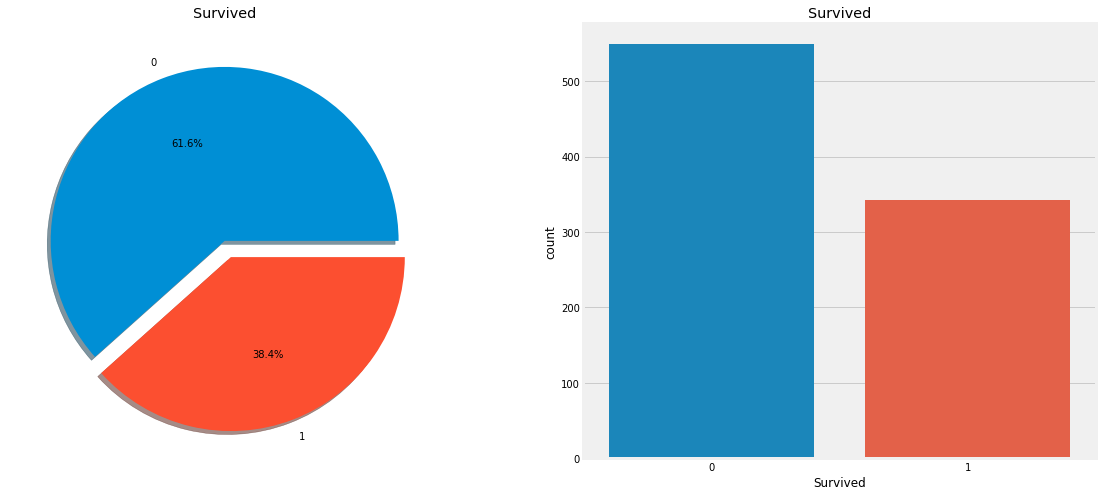

In [5]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- training set에서 891명의 탑승객 중, 350명 만이 생존했고 이는 전체의 38.4%에 해당
- Sex, Embarked, Age 등의 다른 feature가 생존율에 영향을 미치는지 아래에서 살펴볼 것

### Types Of Features
#### Categorical Features
 - 두 개 이상의 범주를 갖는 변수 타입으로 각각의 값이 그 자체로 분류됨
 - 예를 들어, 성별은 범주형 변수로 두 개의 카테고리(남성, 여성)를 가짐
 - 범주형 변수는 정렬하거나 순서를 가질 수 없음
 - 이를 Nominal variables라고도 부름
 - 해당 프로젝트에선 Sex, Embarked가 categorical features 임

#### Ordinal Features
 - 범주형 변수와 비슷하지만, 값들의 상대적인 순서를 정하거나 정렬을 할 수 있다는 점에서 다름
 - 예를 들어, 키(Tall, Medium, Short)와 같은 feature가 ordinal feaure임
 - 이 데이터셋에선 Pclass가 ordinal feature
 
#### Continuous Features
 - 어느 두 지점 사이 혹은 최소값과 최대값 사이의 값을 가짐
 - 여기선 Age가 continuous feature

## Analysisng The Features
### Sex -> Categorical Feature

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

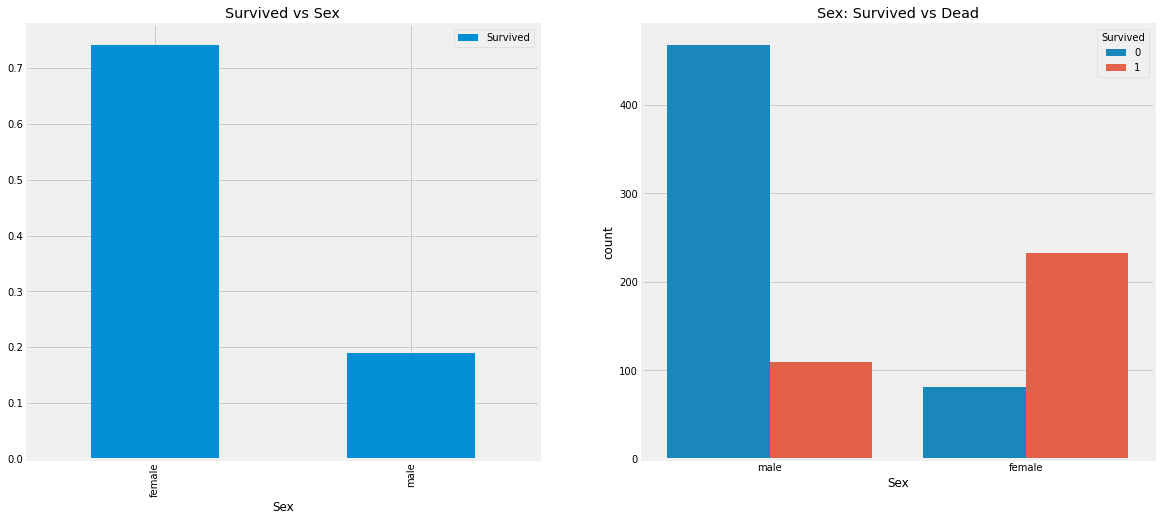

In [7]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 탑승객 중 남자 탑승객이 여자 탑승객보다 훨씬 많지만, 생존자는 여자가 남자의 약 2배임
- 여자 탑승객의 생존율이 약 75%인데 비해 남자 탑승객의 생존율은 약 18 ~ 19%

### Pclass -> Ordinal Feature

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


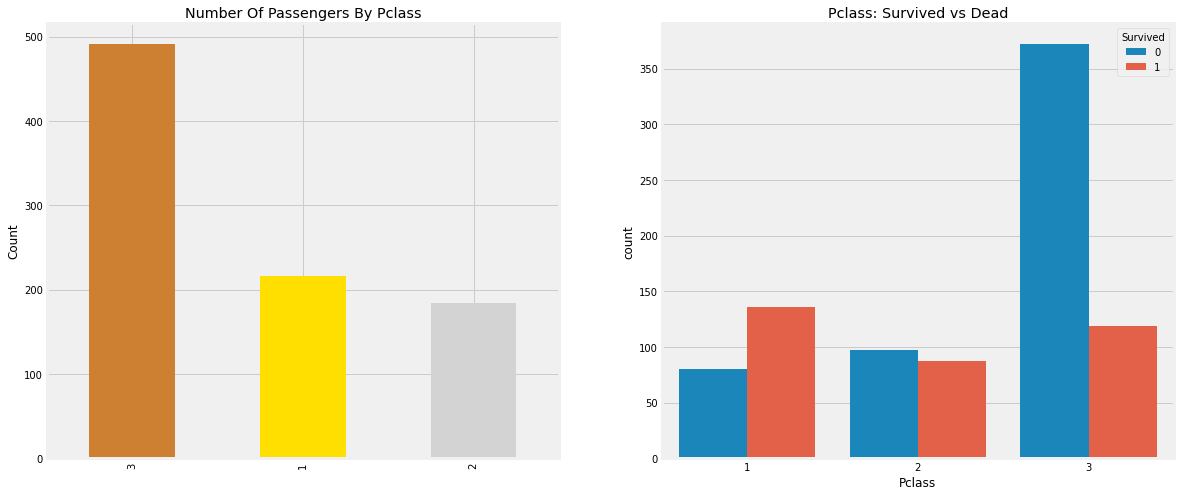

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

- 돈으로 모든 걸 살 수 없다고들 하지만,,
- Pclass별로 생존률을 비교했을 때, Pclass가 1인 탑승객이 더 많이 구조되었음
- Pclass가 3인 탑승객 수가 훨씬 많지만, 생존자 수는 매우 적고 그 비율은 약 25% 정도
- Pclass=1의 경우 약 63%, Pclass=2의 경우 약 48%가 생존함

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

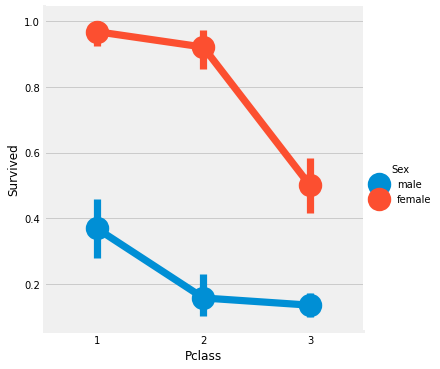

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

- 카테고리별로 그래프를 만드는 FactorPlot을 사용
- CrossTab과 FactorPlot을 봤을 때, Pclass가 1인 여성의 경우 생존률이 약 95-96%에 달했고, 해당 그룹의 94명 중 3명 만이 사망함
- 같은 Pclass 1 남성의 생존률이 매우 낮음을 감안했을 때, 구조 우선순위가 남성보다 여성이 더 높았음을 짐작할 수 있음
- 이처럼 Pclass는 생존률을 예측하는 데 중요한 feature 중 하나

### Age -> Continuous Feature

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), ' Years')
print('Youngest Passenger was of:', data['Age'].min(), ' Years')
print('Average Age on the ship:', data['Age'].mean(), ' Years')

Oldest Passenger was of: 80.0  Years
Youngest Passenger was of: 0.42  Years
Average Age on the ship: 29.69911764705882  Years


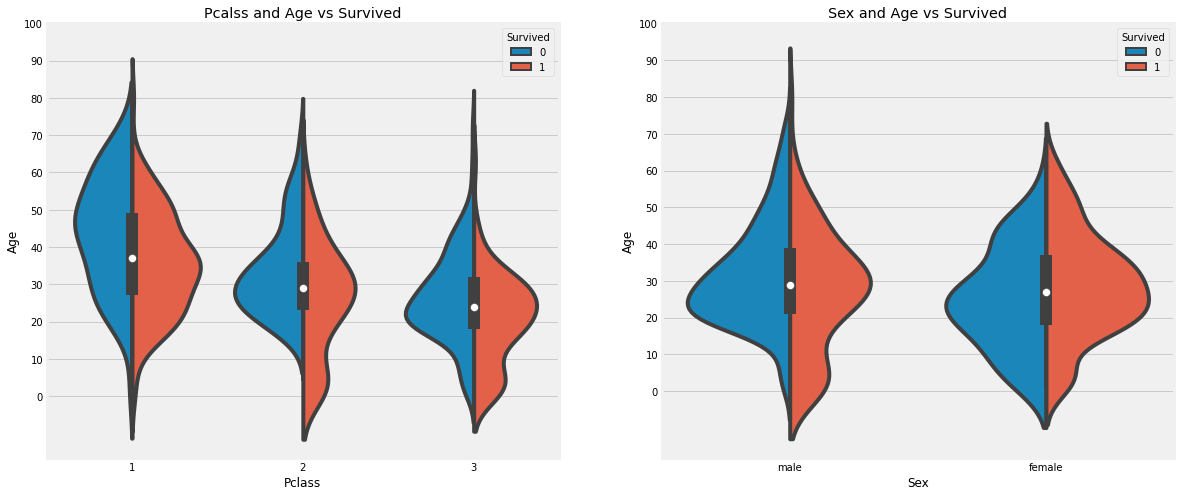

In [13]:
f, ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pcalss and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### Observations:
- Pclass가 늘어날수록 어린이(0~10세)의 수가 증가하며 해당 연령층은 Pclass와 관계없이 생존률이 높은 편
- Pclass1의 20-50 대의 생존률이 높으며 남성보다는 여성이 높다.
- 연령층이 증가할수록 남성의 생존률을 낮아짐

- Age 데이터의 경우, 177개가 null 값이므로 이를 채워야 함. 이 튜토리얼에선 평균 값으로 null 값을 대체함
- 다만, 평균 연령이 29세라고 해서 이를 일률적으로 적용하면 실제 나이 4세의 아이에게도 29세로 값을 적용하게 됨
- 이러한 문제를 개선하고자 Mr, Mrs, Miss 등 이름의 initial을 기준으로 그룹화해서 평균 값을 적용하고자 함

In [14]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

- 위 정규식([A-Za-z+)]은 A-Z 혹은 a-z 와 . 사이에 있는 문자열을 추출함
- 즉, 알파벳 값으로 시작하면서 .으로 끝나는 부분을 추출 (대신 .을 포함하지 않음)

- extract는 pandas에 속한 메소드이고
- 문자열에서 정규표현식으로 특정 문자열을 찾으려면 findall 을 사용할 수 있음

In [15]:
import re

result = re.findall('([A-Za-z]+)\.', 'Heikkinen, Miss. Laina')
result

['Miss']

#### 성별에 따른 'Initial' 값 확인

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
data.Initial.replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                     ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages
- Assigning the NaN Values with the Ceil values of the mean ages

In [19]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [20]:
data.Age.isnull().any()

False

In [21]:
data[data['Survived'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Mrs
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,Miss


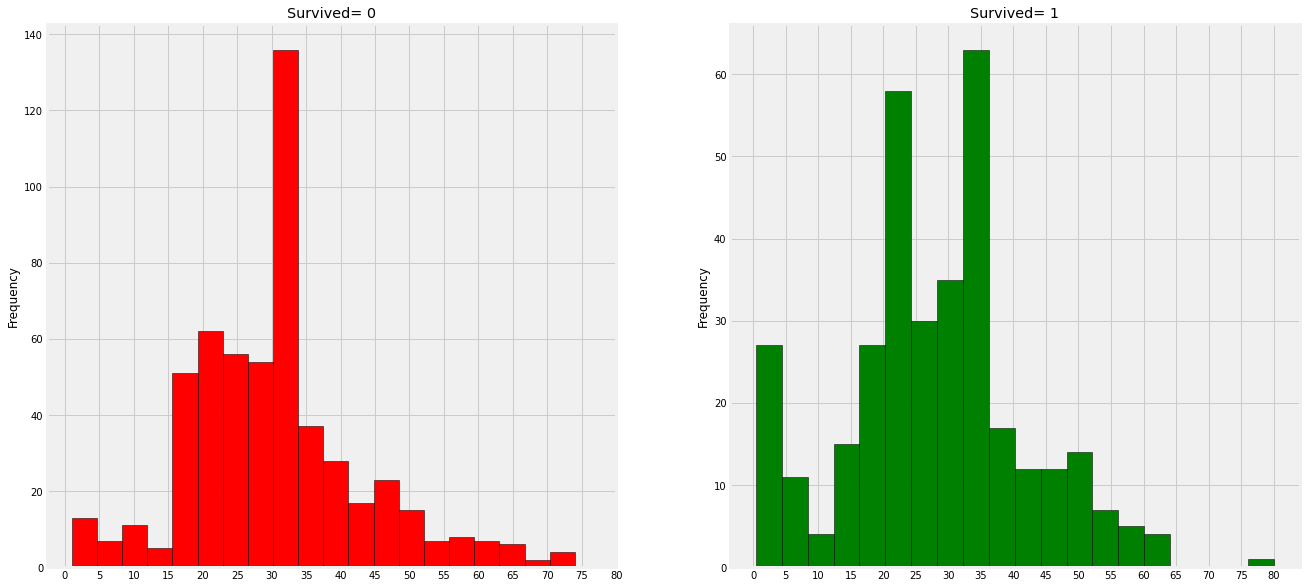

In [22]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

#### Observations
- 나이가 5세 미만인 경우, 생존률이 높음 (the women and child first policy)
- 가장 나이가 많은 승객은 생존함 (80 years)
- 가장 많이 사망한 나이대는 30~40세 그룹

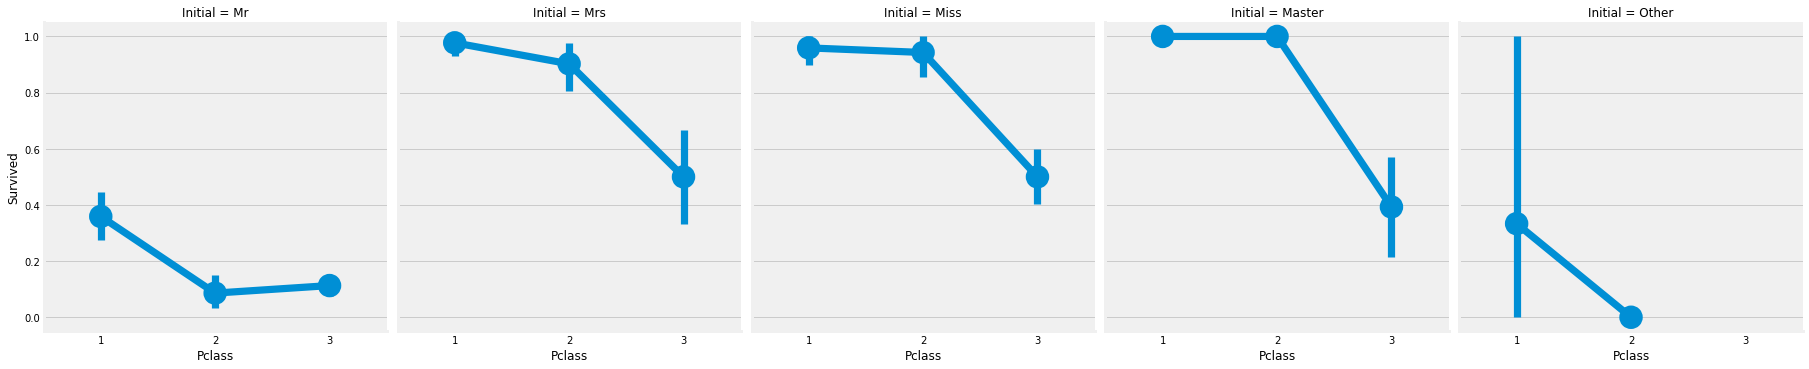

In [23]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

- 위 FactorPlot에 의해 Pclass와는 관계없이 여자와 아이가 우선적으로 구조된 것을 알 수 있음 (The women and Child first policy)

### Embarked -> Categorical Value

In [24]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation

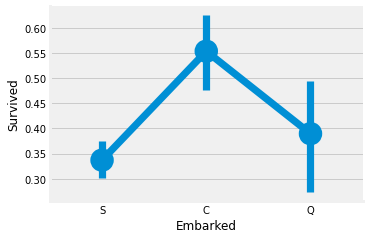

In [25]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

- 생존률은 항구 S에서 가장 낮은 반면, 항구 C는 0.55로 가장 높음

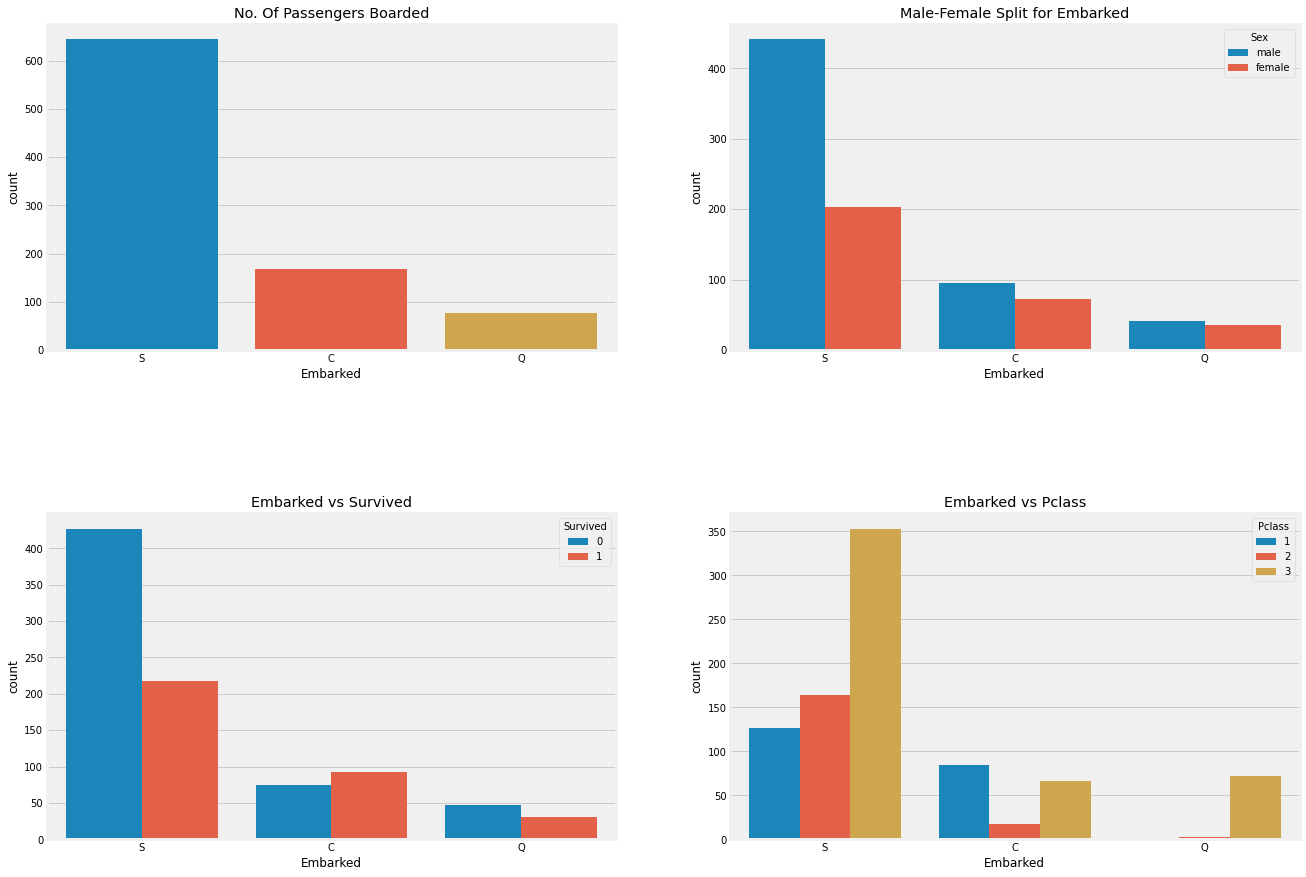

In [26]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', data=data, hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Observations
- [0,0] : 항구 S에서 탑승객이 가장 많았고, 대다수는 Pclass가 3
- [1,0], [1,1] : 항구 C의 탑승객들은 생존률이 좋은 편인데, 이는 Pclass 1과 Pclass 2 탑승객들이 모두 구조되었기 때문일 것
- 항구 S에서 부유층의 대부분이 탑승했는데도 생존률이 낮은 이유는 Pclass 3의 대부분인 약 81%가 생존하지 못했기 때문.
- 항구 Q의 탑승객 중 거의 95%는 Pclass 3에 속함

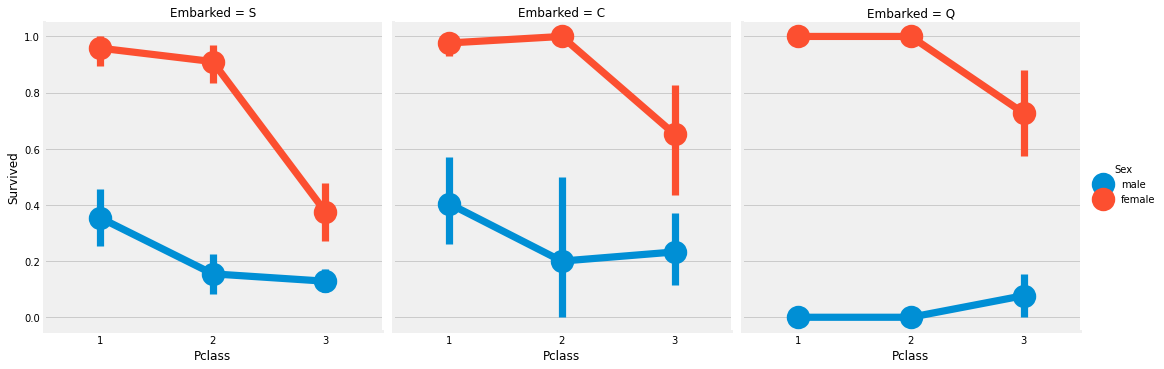

In [27]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

#### Observations
- Pclass 1과 Pclass 2에 속한 여성은 생존률이 거의 100(%)에 가까움
- 항구 S에서 탑승한 Pclass 3의 승객들은 생존률이 여성과 남성 모두 매우 낮음 (Money Matters)
- 항구 Q의 탑승객 중 Pclass 3에 속하는 남자 승객은 거의 대부분 사망함 (Pclass에 관계없이 대부분 사망한 듯?)

#### Filling Embarked NaN
- 탑승객이 가장 많은 항구는 S이므로, Embarked의 null 값을 S로 대신 넣어줌
- 최빈값으로 결측치 대체하는 방법

In [28]:
data['Embarked'].fillna('S', inplace=True)

In [29]:
data.Embarked.isnull().any()

False

### SibSip -> Discrete Feature
- 'SibSp'는 탑승 단위가 혼자(개인)인지 가족인지를 의미함
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife

In [30]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


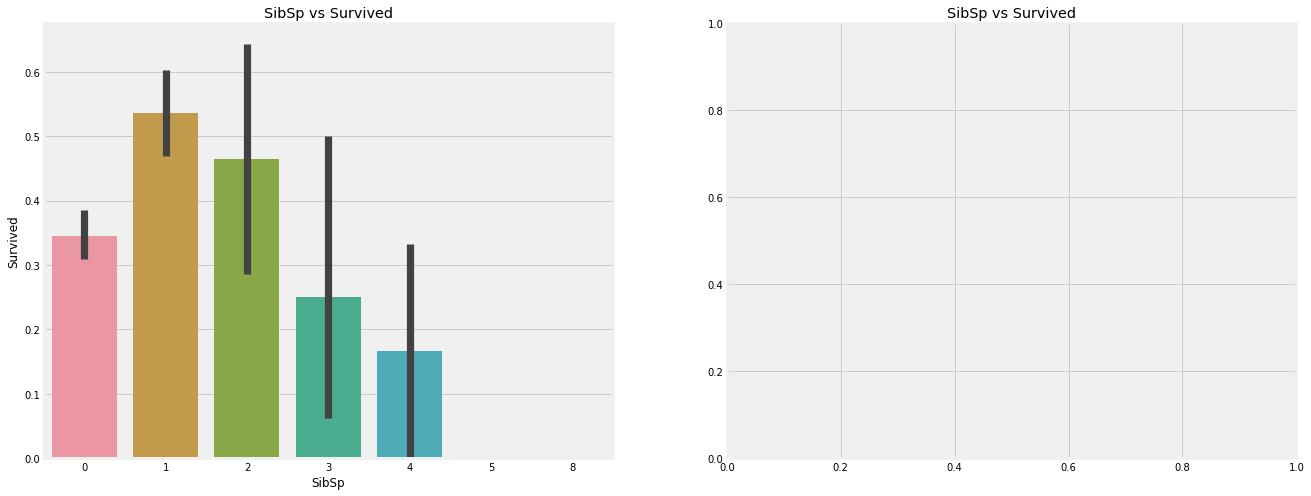

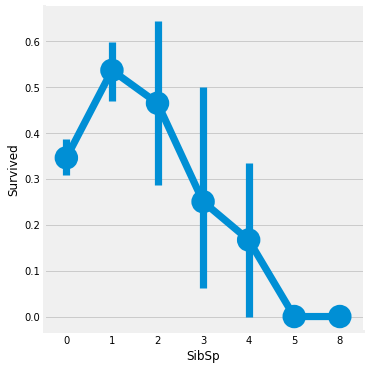

In [31]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2)
plt.show()

In [32]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Observations
- barplot과 factorplot을 통해 만약 승객이 형제자매 없이 탑승했다면, 생존률이 34.5%에 달하는 것을 확인할 수 있다.
- 형제자매 수가 늘수록 rough하게 생존률이 감소하는데, 이는 가족이 탑승했을 경우, 자신보다는 가족을 우선적으로 구조 요청 했을 것으로 예상
- 5 ~ 8명의 가족의 경우, 생존률이 0%임. 이는 Pclass feature 때문이라고 할 수 있는데, crosstab을 보면서 확인할 수 있음
- SibSp 값이 3이 넘을 경우, 모두 Pclass 3에 속했음. 즉 대가족은 모두 사망했음.

### Parch : Parent and children

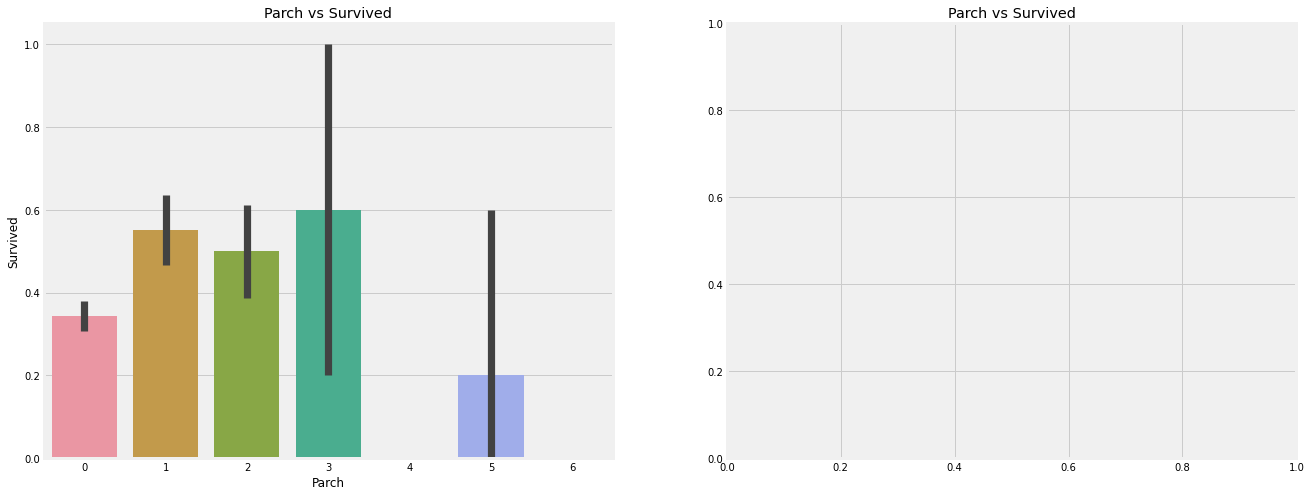

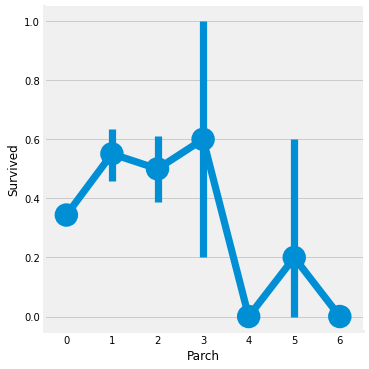

In [33]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
#plt.close(2)
plt.show()

#### Observations
- 부모와 함께 탑승한 승객의 경우, 생존률이 높았지만 Parch 값이 커질수록 생존률은 감소했음
- Parch가 1~3명인 탑승객인 경우 생존률이 괜찮았고, 혼자인 경우 생존률이 낮았음. 또한, 4명보다 많은 경우엔 생존률이 감소함

### Fare -> Continuous Feature

In [34]:
print('Highest Fare was: ', data['Fare'].max())
print('Lowest Fare was: ', data['Fare'].min())
print('Average Fare was: ', data['Fare'].mean())

Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.204207968574636


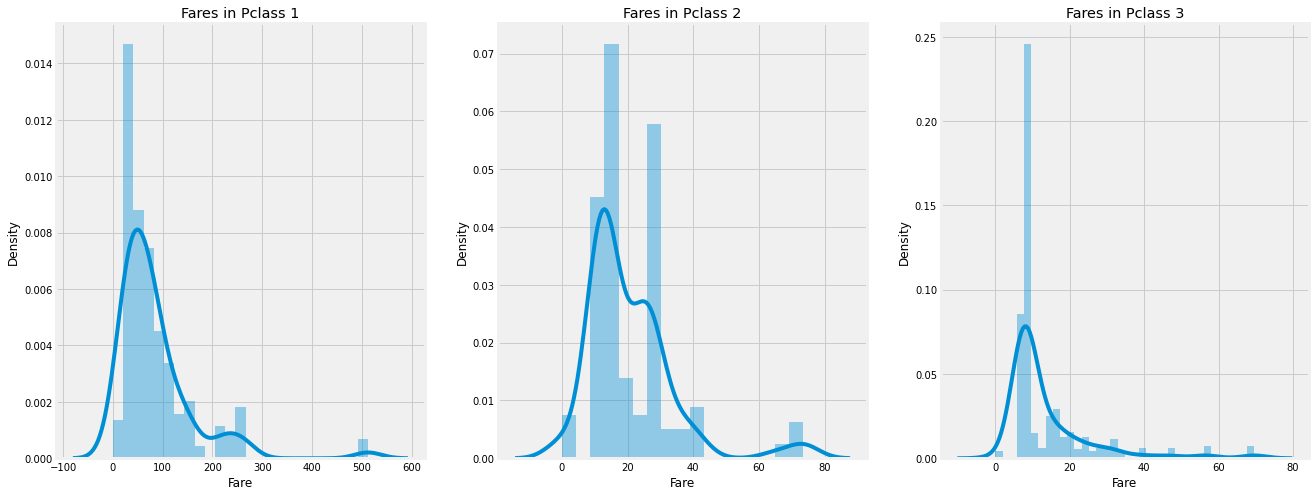

In [35]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

#### Observations in a Nutshell for all features
- Sex : 남성보다 여성의 생존률이 높음
- Pclass : 1st class 승객의 생존률이 높았으며, Pclass 3에 속한 경우엔 매우 낮았음. Pclass가 1이면서 여성인 경우 생존률이 1에 가까웠으며 Pclass가 2인 경우에도 높았음.
- Age : 5 ~ 10세 어린이의 생존률이 높았고, 15 ~ 35세 연령층의 승객들의 사망률이 높았음
- Embarked : Pclass 1의 대부분의 승객이 S에 있음에도 불구하고 C에서의 생존률이 더 높음. Q에서의 탑승객은 전부 Pclass 3에 해당
- Parch + SibSp : 1~2명의 sibling 혹은 spouse가 있거나, 1~3명의 parents가 있는 승객의 생존 확률이 혼자이거나 대가족과 함께 탑승한 승객보다 더 높음

### Correlation Between The Features

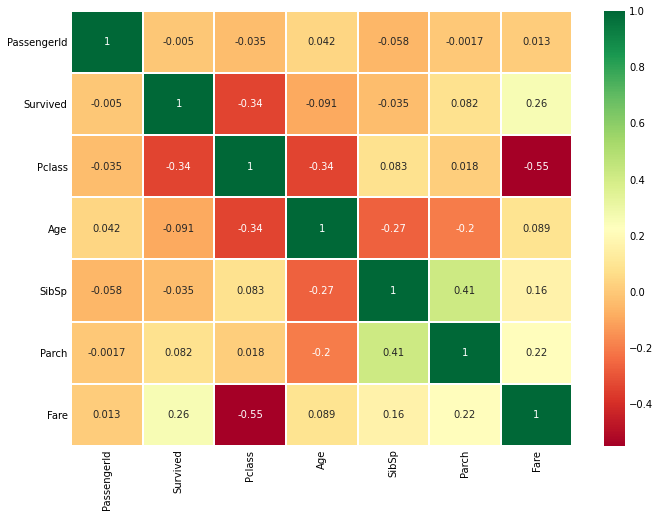

In [36]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Interpreting the heatmap
- 상관관계는 숫자형 변수에 대해서만 비교 가능, 문자형은 안 됨
- 양의 상관관계(positive correlation) : feature A가 증가하면 feature B도 증가하는 관계로, 0 ~ 1의 범위에서 1이 가장 강한 양의 상관관계를 의미
- 음의 상관관계(negative correltation) : feature A가 증가하면 feature B는 감소하는 관계, -1 ~ 0의 범위에서 -1이 가장 강한 음의 상관관계를 의미
- 어떠한 두 features가 아주 높은 상관관계에 있다면, 두 feature가 아주 유사한 정보를 포함하고 있으며, 그 정보에 있어서 변화?분산?이 거의 없음을 의미
- 위와 같은 경우를 다중공선성(MultiColinerarity)이라 하며, 쉽게 말하자면 두 feature가 비슷해서 거의 같은 정보를 담고 있는 경우임
- 따라서 둘 중 하나의 feature 만 사용해도 되므로 둘 중 하나는 redundant(불필요)함. 이러한 feature를 삭제해서 모델을 생성하거나 training 시킬 때 시간을 감소시키는 등의 이점을 볼 수 있다.

# Part2: Feature Engineering and Data Cleaning
- 데이터 셋의 모든 features가 중요한 경우는 거의 없을 것이다.
- 따라서 불필요한 features 는 삭제하고, 다른 features로부터 정보를 얻거나 추출해서 새로운 features를 만들 수도 있다.
- 이게 바로 'feature engineering'

### Age_band
#### Problem with age feature:
- 'Age'는 continuous(연속형) feature로, 이는 머신러닝 모델에서 문제를 일으킬 수 있음
- 예를 들어 categorical feature인 'Sex'의 경우, female이나 male로 데이터를 구분해서 모델을 학습시키는 데 사용할 수 있음
- 반면, 'Age'는 30명의 Age가 모두 다른 경우, 결국 30개의 value가 생기므로 머신러닝 데이터에 적합하지 않음
- 따라서 continuous value를 categorical value로 변환하여 새로운 feature를 만들어 활용할 수 있음

In [37]:
# 최고령 탑승객의 나이가 80이므로 0부터 80을 5개의 그룹으로 나눠 age_band 생성
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


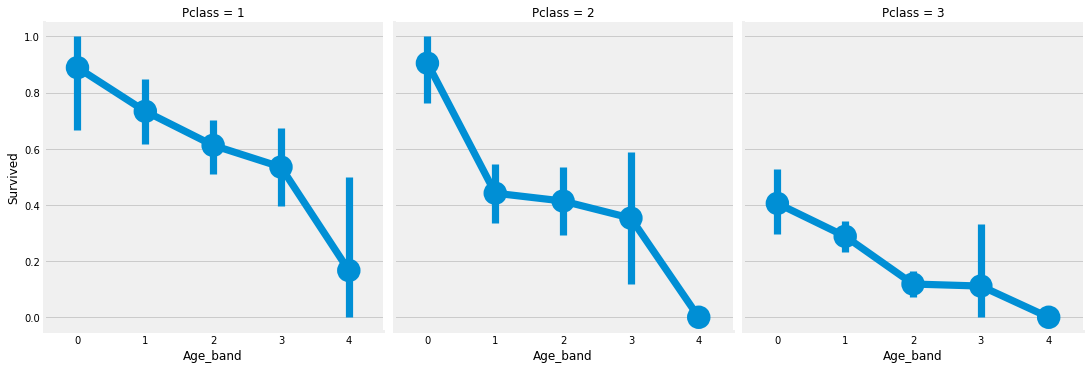

In [39]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

- Pclass와는 관계없이 연령층이 높아지면 생존률이 감소함

### Famiily Size and Alone
- Parch와 SibSp를 사용하여 'Family_Size'와 'Alone' feature를 생성
- 이를 통해 가족 수에 따른 탑승객의 생존률을 관찰할 수 있음
- Alone은 혼자인지 아닌지를 의미하는 binary values

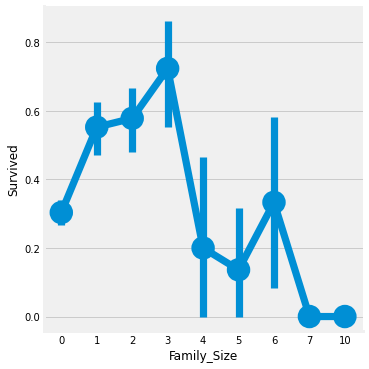

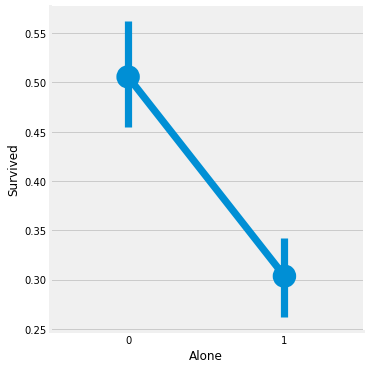

In [40]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

# factorplot이 subplot 위에 매칭이 안 되고 따로 출력됨
#f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
#ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
#ax[1].set_title('Alone vs Survived')
#plt.close(2)
#plt.close(3)
plt.show()

- family_size=0이거나 alone이 1일 경우, 생존률이 매우 낮았음
- 또한 family_size가 5이상일 경우, 생존률이 감소함

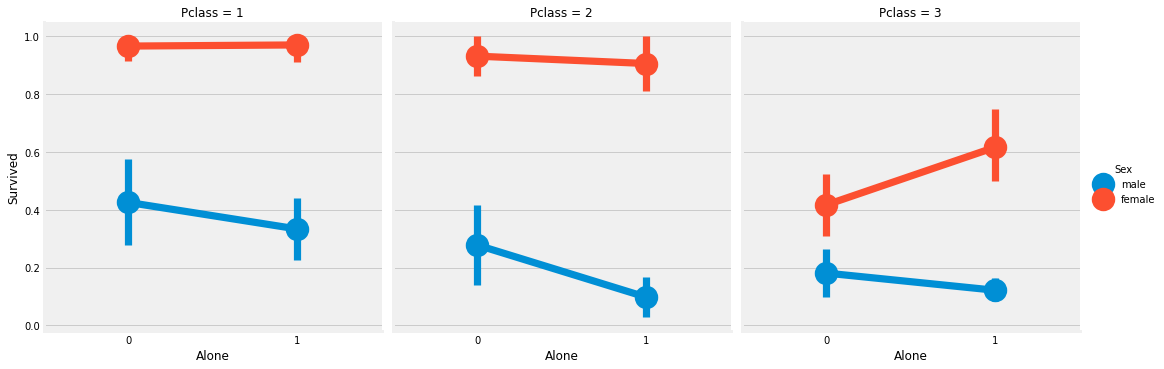

In [41]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

- Pclass=3인 경우를 제외하고, 성별과 Pclass에 관계없이 alone이면 생존률이 낮았음
- 한편, Pclass=3인 여성의 경우, 가족이 있는 것보다 없는 경우 생존률이 높음

###  Fare_Range
- continuous value -> ordinal value (with pandas.qcut)
- qcut는 해당 feature를 주어진 값에 따라 분리하는 역할

In [42]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- fare_range가 높아질수록 생존률도 증가함

In [43]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 512.329), 'Fare_cat'] = 3

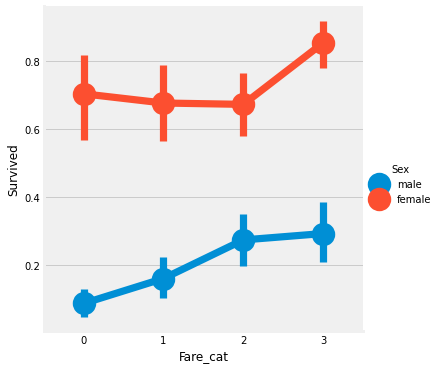

In [44]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

### Converting String Values into Numeric
 - string 타입의 변수를 머신러닝 모델은 이해할 수 없으므로 숫자형 타입으로 변경해줘야 함

In [45]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

### Dropping UnNeeded Features
- Name : 범주형으로 바꿀 수 없으니 불필요
- Age : Age_band 새로 만들었으므로 불필요
- Ticket : 범주화할 수 없는 랜덤 문자열이라 불필요
- Fare : Fare_cat 있으므로 불필요
- Cabin : NaN 값이 많고 많은 승객이 여러 cabin 값을 가지고 있으므로 불필요
- Fare_Range : fare_cat 있음
- PassengerId : 범주화 불가능하므로 불필요

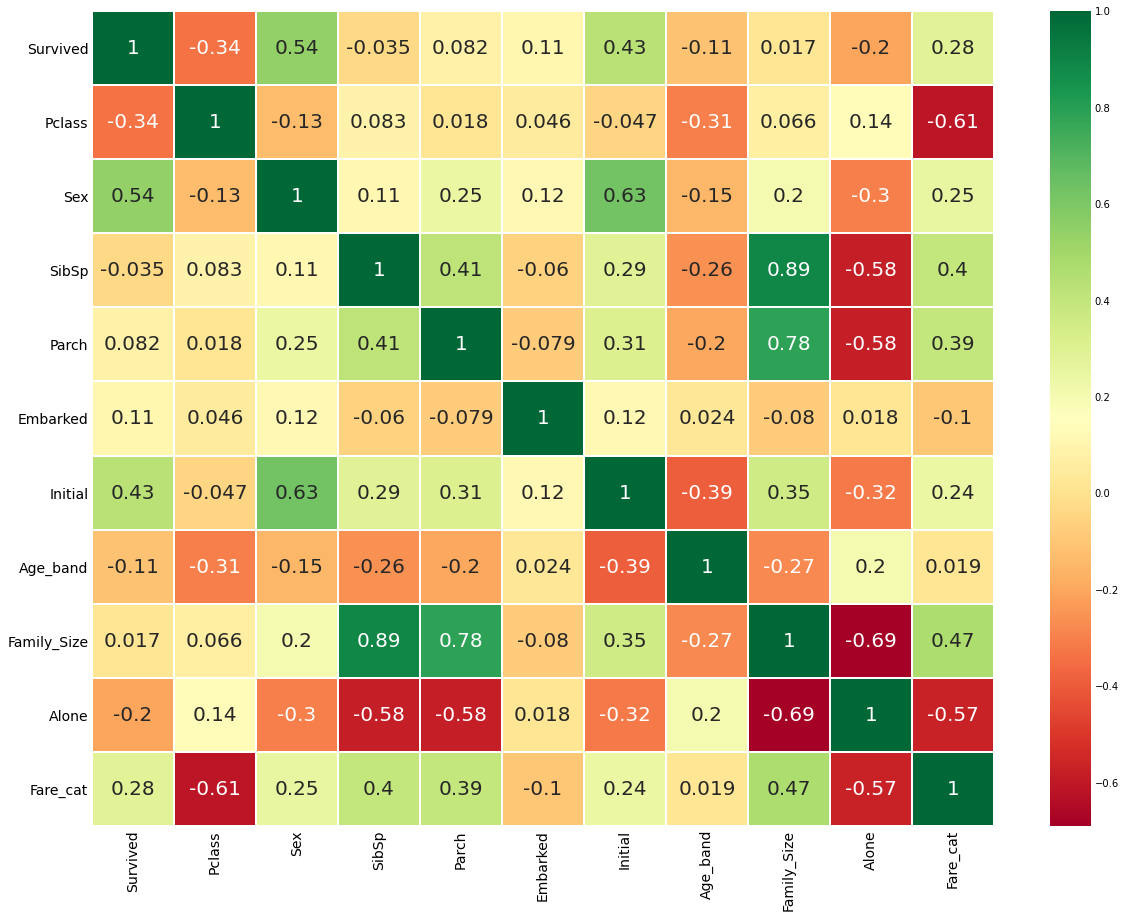

In [46]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- positive relation : Family Size - SibSp, Family Size - Parch
- negative relation : Famaily Size - Alone

# Part3: Predicting Modeling
#### the algorithms to make the model
- 1) Logistic Regression
- 2) Suport Vector Machines (Linear and radial)
- 3) Random Forest
- 4) K-Nearest Neighbours
- 5) Naive Bayes
- 6) Decision Tree
- 7) Logistic Regression

In [47]:
# importing all the require ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [48]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines (rbf-SVM)

In [49]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vecotr Machine (linear-SVM)

In [50]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8208955223880597


### Decision Tree

In [52]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


### K-Nearest Neighbours (KNN)

In [53]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8283582089552238


- KNN 모델의 경우 n_neighbours 파라미터 값을 어떻게 주느냐에 따라 정확도가 달라짐
- default 값은 5

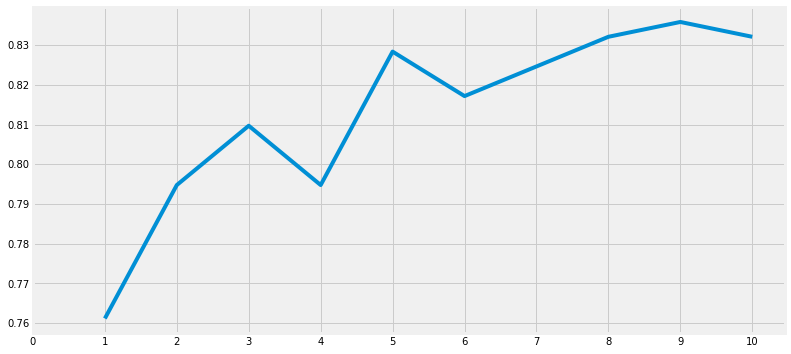

Accuracies for different values of n are:  [0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955]  with the max value as  0.835820895522388


In [54]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are: ', a.values, ' with the max value as ', a.values.max())

### Gaussian Naive Bayes

In [55]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


### Random Forests
- 랜덤 포레스트의 하이퍼파라미터
- n_estimators: 결정 트리의 개수
- max_features: 결정 트리에 사용된 max_features 파라미터와 동일, 대신 RandomForestClassifier의 기본 max_Features는 auto로 sqrt와 같음 (e.g., 전체 피처 16개면 4개만 참조)
- max_depth, min_samples_leaf : overfitting을 개선하기 위해 사용되는 파라미터

In [56]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is ', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is  0.8171641791044776


- 여기서 주의할 점은 모델의 정확성이 분류기의 견고성을 결정하는 유일한 요소는 아니라는 것
- 만약 training되고 testing을 거친 후에 90% 정확도를 보이는 분류기가 새로운 테스트 셋에 대해 항상 90%의 정확도를 보장할 수는 없음
- 이는 분류기가 train을 위해 사용할 모든 인스턴스를 결정할 수 없기 때문
- test와 train 데이터 셋이 변경되면 정확도 역시 변경되고, 그 값은 증가하거나 감소할 수 있음. 이를 모델 분산(model variacne)라고 함
- 이를 해결하기 위해 Cross validation을 통해 일반화된 모델을 생성할 수 있음 

## Cross Validation
- 대부분의 데이터는 불균형하기 때문에, 데이터 셋의 모든 인스턴스에 대해 train하고 test해야 함
- cross validation 중 하나로 K-fold Cross validation이 있음. 간략히 말하면 데이터셋을 k개의 서브 셋으로 나눠서 train과 test 데이터를 나누는 것
- 알고리즘의 결과로, 데이터에 대해 과대적합 혹은 과소적합이 발생할 수 있지만, 결과의 평균을 계산하기 때문에 일반화된 모델을 얻을 수 있음

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# k=10, split the data into 10 equal parts
#kfold = KFold(n_splits=10, random_state=22)
kfold = KFold(n_splits=10)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for model in models:
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.791223,0.045646
Radial Svm,0.828290,0.034427
Logistic Regression,0.803596,0.024186
KNN,0.812659,0.041477
Decision Tree,0.812597,0.025908
Naive Bayes,0.799139,0.028757
Random Forest,0.812597,0.030393


- 각 classifier로 모델을 만들면 이 모델이 괜찮은지 확인하기 위해 validation을 진행
- 위 코드를 보면 알겠지만, cross validation을 위한 하나의 방식 중 k-fold validation이 있는 것

<AxesSubplot:>

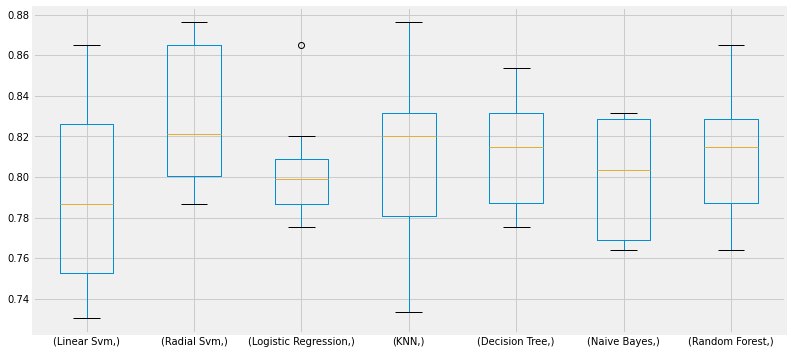

In [58]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

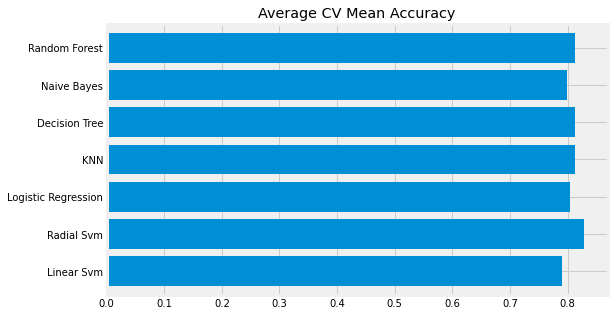

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- 데이터가 불균형하면 분류 정확도가 떨어질 수 있음
- confusion matrix를 통해 모델이 잘못되었는지 혹은 모델이 잘못 예측한 클래스에 대해 알 수 있음

### Confusion Matrix

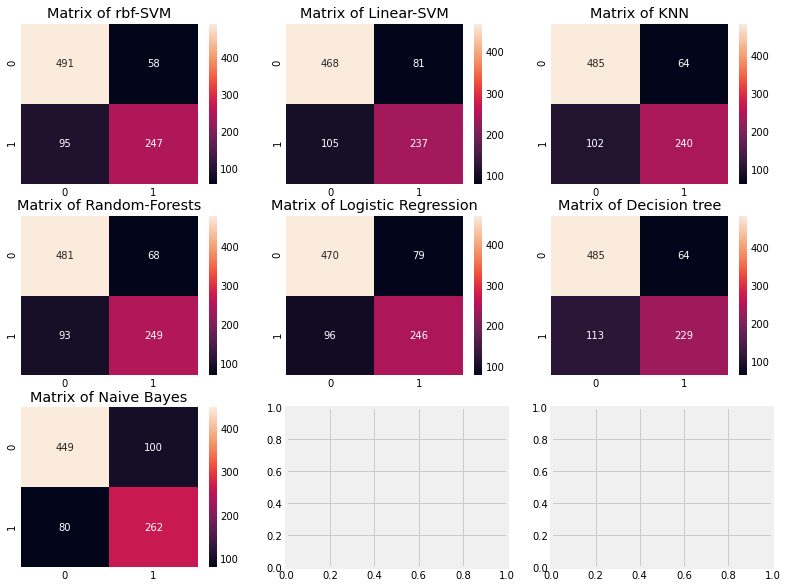

In [60]:
f, ax = plt.subplots(3, 3, figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
# fmt : String formatting code to use when adding annotations
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix of rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix of Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix of KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix of Random-Forests')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix of Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix of Decision tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix of Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix
- left diagonal : the number of correct predictions
- right diagonal : the number of wrong predictions

- rbf-SVM 결과 해석
- 정확한 예측은 491(for dead) + 247(for survived)로 (491+247)/891 = 82.8%의 정확도
- 잘못 분류된 건 58(for dead), 95(for survived)로, 사망 인원을 생존 인원으로 더 많이 잘못 예측해냄 (반대의 경우보다)

### Hyper-Parameters Tuning
- 머신러닝 알고리즘 대부분은 파라미터를 가지고 있는데, 따로 설정하지 않는 이상 default 값으로 수행됨
- SVM 모델의 C와 gamma 파라미터처럼 사용자가 직접 설정할 수 있는 파라미터가 있는데, 이를 하이퍼 파라미터라고 함
- 하이퍼 파라미터 튜닝을 통해 알고리즘의 학습률을 바꿀 수 있음

#### SVM

In [61]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper={'kernel': kernel, 'C': C, 'gamma': gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.6, gamma=0.1)


#### Random Forests

In [62]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8193208210407382
RandomForestClassifier(n_estimators=900, random_state=0)


- Rbf-SVM의 가장 높은 정확도는 C=0.05, gamma=0.1일 때 82.82%
- RandomForest의 가장 높은 정확도는 n_estimators=900일 때 81.8%

## Ensembling
- 여러 모델을 조합해서 하나의 모델을 만들어내는 방식으로, 모델의 성능을 향상시킬 수 있음

### Voting Classifier

In [63]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                               ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                               ('LR', LogisticRegression(C=0.05)),
                                               ('DT', DecisionTreeClassifier(random_state=0)),
                                               ('NB',  GaussianNB()),
                                               ('svm', svm.SVC(kernel='linear', probability=True))], voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is: ', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is ', cross.mean())

The accuracy for ensembled model is:  0.8246268656716418
The cross validated score is  0.8249188514357053


### Bagging
- 데이터 셋의 일부를 비슷한 분류기에 적용한 후 그 예측 값의 평균을 사용
- 평균을 내기 때문에 variance가 감소함
- voting classifier와는 다르게 Bagging은 비슷한 분류기를 사용

#### Bagged KNN
- Bagging은 높은 분산을 갖는 모델(Decision Tree, Random Forests)에 가장 적합함

In [64]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is: ', result.mean())

The accuracy for bagged KNN is:  0.835820895522388
The cross validated score for bagged KNN is:  0.8171660424469414


#### Bagged Decision Tree

In [65]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is: ', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is: ', result.mean())

The accuracy for bagged Decision Tree is:  0.832089552238806
The cross validated score for bagged Decision Tree is:  0.8160174781523096


### Boosting
"""
Boosting is an ensembling technique which uses sequential learning of classifiers. 
It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. 
Now the model will get some instances right while some wrong. 
Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. 
Thus it will try to predict the wrong instance correctly. 
Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.
"""

- GBM(Gradient Boosting Machine) 하이퍼 파라미터
- loss: 경사 하강법에서 사용할 비용 함수. 디폴트는 deviance이며, 일반적으로 디폴트 그대로 사용함
- learning_rate: GBM이 학습할 때마다 적용하는 함수. 0~1 사이의 값을 가지며 디폴트는 0.1. 값이 작으면 성능↑, 수행시간↑, 값이 커지면 성능↓, 수행시간↓
- n_estimators: weak learner의 개수. 개수가 많을수록 예측 성능이 일정 수준까지는 좋아지지만 수행시간 오래 걸림. 디폴트는 100
- subsample: weak learner가 학습에 사용하는 데이터 샘플링의 비율. 디폴트는 1. 예를 들어 0.5면 학습데이터의 50%를 기반으로 학습한다는 의미. 과적합이 염려되는 경우, 1보다 작은 값으로 설정


#### AdaBoost (Adaptive Boosting)

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is: ', result.mean())

The cross validated score for AdaBoost is:  0.8271660424469414


#### Stochastic Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is: ', result.mean())

The cross validated score for Gradient Boosting is:  0.8137827715355804


#### XGBoost
- XGBoost는 초기의 독자적인 XGBoost 프레임 워크 기반의 파이썬 wrapper XGBoost 모듈과 사이킷런과 연동되는 사이킷런 wrapper XGBoost 모듈이 있음
- 파이썬 래퍼 XGBoost와 사이킷런의 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix 를 생성한다는 것

In [68]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1, eval_metric='mlogloss')
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is: ', result.mean())

The cross validated score for XGBoost is:  0.8216229712858926


#### Hyper-Parameter Tuning for AdaBoost
- AdaBoost를 사용한 가장 높은 정확도는 83.16%였으며, 하이퍼 파라미터가 n_estimator=200, learning_rate=0.05 일 때, 가장 높은 정확도를 보임

In [69]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8271483271608814
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


### Confusion Matrix for the Best Model

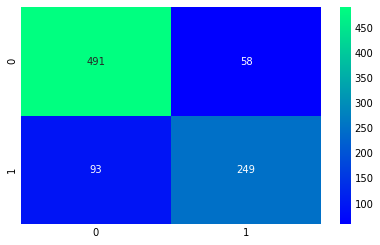

In [70]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

[10:41:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


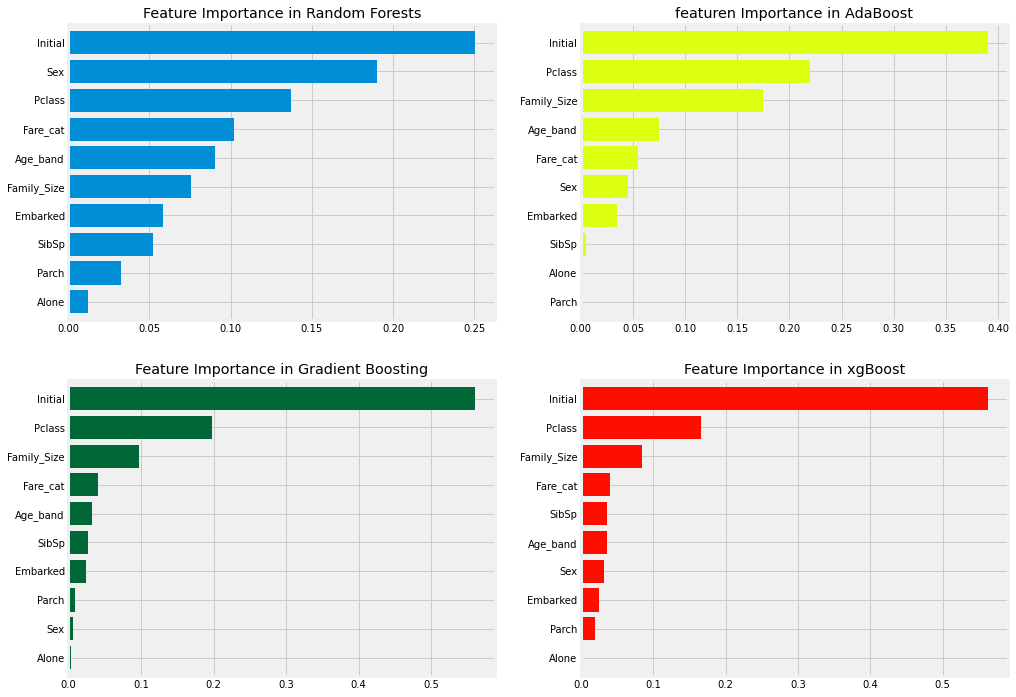

In [71]:
f, ax = plt.subplots(2, 2, figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('featuren Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in xgBoost')

plt.show()

#### Observations
- 1) 공통된 중요한 feature로는 Initial, Fare_cat, Pclass, Family_size가 있음
- 2) 이전 결과에서 Pclass와 결합한 'Sex' feature는 차별화된 factor 중 하나라고 보여졌는데, 랜덤 포레스트 제외하고는 딱히 중요한 feature로 보이지 않음. 하지만 모든 classifier에서 가장 큰 importance를 갖는 Initial은 'Sex' feature와 양의 상관관계를 가지고, 두 feature 모두 성별과 관련된 요소임